In [4]:
!kaggle datasets download -d caiojs/mnist-as-images-train-and-test

Dataset URL: https://www.kaggle.com/datasets/caiojs/mnist-as-images-train-and-test
License(s): DbCL-1.0
100% 48.6M/48.6M [00:03<00:00, 25.0MB/s]
100% 48.6M/48.6M [00:03<00:00, 16.5MB/s]


In [5]:
!unzip /content/mnist-as-images-train-and-test.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train_images/9/1820.jpg  
  inflating: train_images/9/18211.jpg  
  inflating: train_images/9/18228.jpg  
  inflating: train_images/9/18241.jpg  
  inflating: train_images/9/18251.jpg  
  inflating: train_images/9/1826.jpg  
  inflating: train_images/9/18277.jpg  
  inflating: train_images/9/18296.jpg  
  inflating: train_images/9/183.jpg  
  inflating: train_images/9/18350.jpg  
  inflating: train_images/9/18355.jpg  
  inflating: train_images/9/18374.jpg  
  inflating: train_images/9/18377.jpg  
  inflating: train_images/9/18382.jpg  
  inflating: train_images/9/18387.jpg  
  inflating: train_images/9/18401.jpg  
  inflating: train_images/9/18405.jpg  
  inflating: train_images/9/18415.jpg  
  inflating: train_images/9/18437.jpg  
  inflating: train_images/9/18441.jpg  
  inflating: train_images/9/18448.jpg  
  inflating: train_images/9/18458.jpg  
  inflating: train_images/9/18475.jpg  
  inflating: train_images

In [6]:
pip install keras

In [7]:
import pandas as pd #base manipulação de dados formato dataset
import os
import numpy as np
import seaborn as sns #extensao do matlab
import matplotlib.pyplot as plt
from tqdm import tqdm

#bibliotecas para trabalhar com imagem
import cv2 #open cv(visao computacional) processa imagens e videos
from PIL import Image #PIllow (image) manipular arquios de imagem

#bibliotecas deep learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

Exploração de dados

In [8]:
imgPIL = Image.open('/content/test_images/3/1020.jpg')
imgPIL

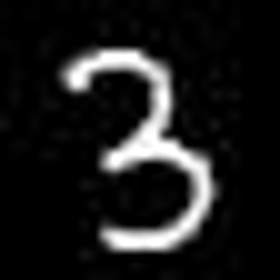

In [9]:
imgPIL = imgPIL.resize((280,280))
imgPIL

In [10]:
imgCV = cv2.imread('/content/test_images/3/1020.jpg')
imgCV

array([[[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[3, 3, 3],
        [0, 0, 0],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

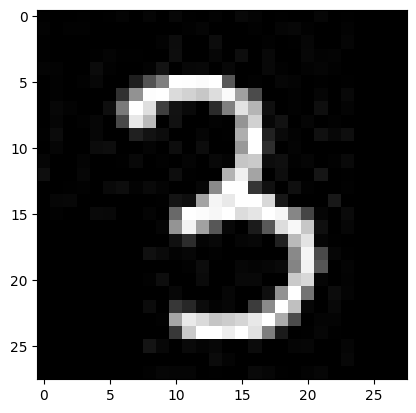

In [11]:
plt.imshow(imgCV)

In [12]:
imgCV.shape

(28, 28, 3)

In [13]:
imgCV = cv2.cvtColor(imgCV, cv2.COLOR_BGR2GRAY)
imgCV.shape

(28, 28)

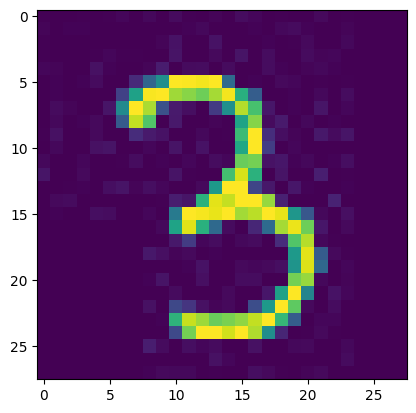

In [14]:
plt.imshow(imgCV)

In [15]:
imgPIL = np.array(imgPIL)

In [16]:
imgPIL.shape

(280, 280)

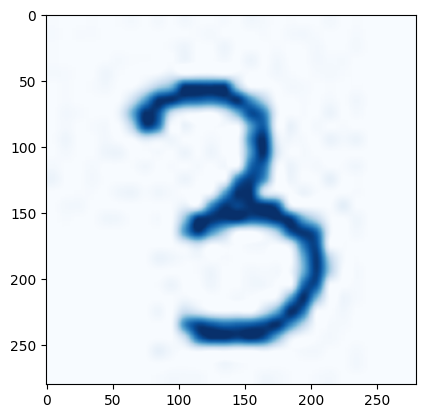

In [17]:
plt.imshow(imgPIL, cmap='Blues')

## Preparação de Dados

In [18]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [19]:
def load_images_and_labels(folder):
  data = {'image': [], 'label': []}

  for label in class_names:
    path = os.path.join(folder,label)
    for file in tqdm(os.listdir(path), desc= f'Loading {label}'):
      img_path = os.path.join(path, file)
      img =cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        data['image'].append(img)
        data['label'].append(label)

  return pd.DataFrame(data)

In [20]:
df_train = load_images_and_labels('/content/train_images')

Loading 9: 100%|██████████| 5949/5949 [00:00<00:00, 22522.75it/s]


In [21]:
df_train.head()

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 0, 7, 5, 0,...",0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 0, 0, 15...",0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 9, 8,...",0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0,...",0


In [22]:
X = df_train['image']
y = df_train['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
print(X_train.shape, y_train.shape)

(48000,) (48000,)


In [24]:
print(X_val.shape, y_val.shape)

(12000,) (12000,)


In [25]:
X_train = np.array([np.array(image) for image in X_train])
X_val = np.array([np.array(image) for image in X_val])

In [26]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [27]:
print(X_train.shape, y_train.shape)

(48000, 28, 28) (48000, 10)


In [28]:
print(X_val.shape, y_val.shape)

(12000, 28, 28) (12000, 10)


## Modelagem

In [29]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,066 (1.21 MB)

 Trainable params: 317,066 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val,y_val))

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.8316 - loss: 1.4323 - val_accuracy: 0.9745 - val_loss: 0.0943
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.9679 - loss: 0.1091 - val_accuracy: 0.9811 - val_loss: 0.0642
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 42ms/step - accuracy: 0.9756 - loss: 0.0832 - val_accuracy: 0.9841 - val_loss: 0.0580


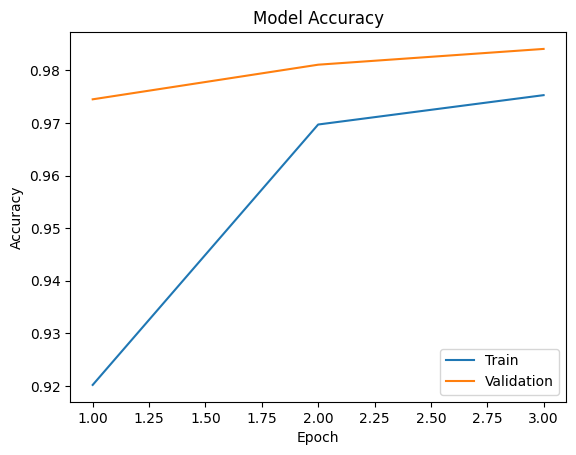

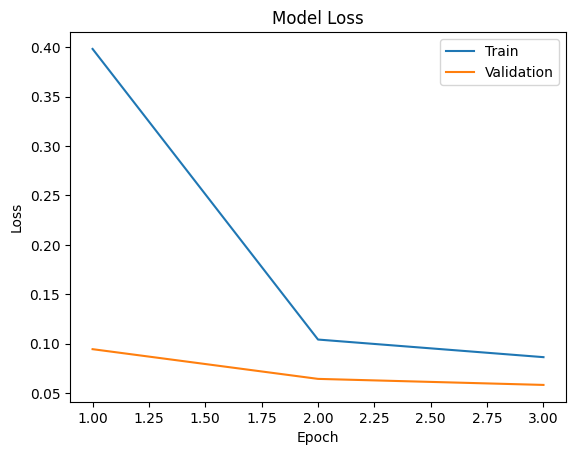

In [33]:
def plotLearningCurve(history, epochs):
  epochRange = range(1, epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()


plotLearningCurve(history,3)

In [34]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1) #convertendo probabilidades em classes

y_val_classes = np.argmax(y_val, axis=1)


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [35]:
matriz = confusion_matrix(y_val_classes, y_pred_classes)
matriz

array([[1171,    1,    4,    0,    0,    0,    2,    0,    1,    2],
       [   0, 1338,    1,    0,    2,    0,    0,    4,    2,    3],
       [   0,    0, 1143,    5,    3,    1,    0,    8,    2,    0],
       [   0,    0,    6, 1183,    0,    3,    0,    1,    8,    2],
       [   1,    2,    0,    0, 1105,    0,    0,    4,    0,   12],
       [   5,    0,    0,   17,    1, 1075,    3,    1,   12,    2],
       [   3,    2,    1,    0,    2,    1, 1207,    0,    5,    0],
       [   0,    3,    2,    0,    6,    0,    0, 1235,    2,    1],
       [   1,    2,    3,    1,    1,    0,    2,    2, 1196,    2],
       [   5,    0,    0,    1,    7,    2,    1,    9,    3, 1156]])

<Axes: >

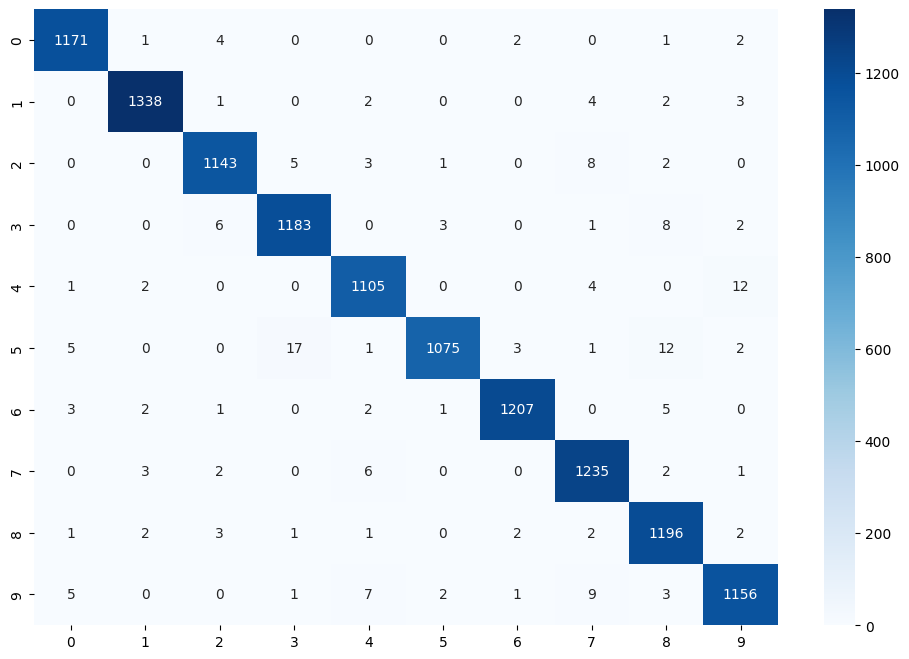

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')

In [37]:
model.save('model.keras')